In [ ]:
!pip install roslibpy

In [ ]:
!pip install open3d

In [ ]:
!pip uninstall opencv-python-headless==4.5.5.62 
!pip install opencv-python-headless==4.1.2.30 

In [1]:
#!git clone https://github.com/felipeg17/grasping_v2.git

Cloning into 'grasping_v2'...
remote: Enumerating objects: 211, done.
remote: Counting objects: 100% (211/211), done.
remote: Compressing objects: 100% (173/173), done.
remote: Total 211 (delta 32), reused 203 (delta 28), pack-reused 0
Receiving objects: 100% (211/211), 14.04 MiB | 18.97 MiB/s, done.
Resolving deltas: 100% (32/32), done.


In [2]:
# Install the Object Detection API
#%%bash
!cd models/research/
!protoc object_detection/protos/*.proto --python_out=.
!cp object_detection/packages/tf2/setup.py .
!python -m pip install .

El sistema no puede encontrar la ruta especificada.
"protoc" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"cp" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
ERROR: Directory '.' is not installable. Neither 'setup.py' nor 'pyproject.toml' found.
You should consider upgrading via the 'C:\Users\user\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [27]:
!rm -rf image_agnostic_segmentation

In [28]:
!git clone https://github.com/AnasIbrahim/image_agnostic_segmentation.git

Cloning into 'image_agnostic_segmentation'...
remote: Enumerating objects: 258, done.
remote: Total 258 (delta 0), reused 0 (delta 0), pack-reused 258
Receiving objects: 100% (258/258), 46.13 MiB | 25.34 MiB/s, done.
Resolving deltas: 100% (85/85), done.


In [29]:
!mkdir -p image_agnostic_segmentation/models
!cd image_agnostic_segmentation/models
!wget https://tu-dortmund.sciebo.de/s/ISdLcDMduHeW1ay/download  -O FAT_trained_Ml2R_bin_fine_tuned.pth
!cd ../scripts

--2022-04-28 03:24:23--  https://tu-dortmund.sciebo.de/s/ISdLcDMduHeW1ay/download
Resolving tu-dortmund.sciebo.de (tu-dortmund.sciebo.de)... 128.176.4.4
Connecting to tu-dortmund.sciebo.de (tu-dortmund.sciebo.de)|128.176.4.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 176217018 (168M) [application/octet-stream]
Saving to: ‘FAT_trained_Ml2R_bin_fine_tuned.pth’

FAT_trained_Ml2R_bi 100%[===================>] 168.05M  19.2MB/s    in 9.7s    

2022-04-28 03:24:33 (17.2 MB/s) - ‘FAT_trained_Ml2R_bin_fine_tuned.pth’ saved [176217018/176217018]

/bin/bash: line 0: cd: ../scripts: No such file or directory


In [30]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-2nzxd7fv
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-2nzxd7fv
     |████████████████████████████████| 50 kB 4.2 MB/s 
     |████████████████████████████████| 74 kB 3.8 MB/s 
     |████████████████████████████████| 147 kB 57.3 MB/s 
     |████████████████████████████████| 130 kB 58.5 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
     |████████████████████████████████| 749 kB 43.2 MB/s 
     |████████████████████████████████| 843 kB 41.6 MB/s 
     |████████████████████████████████| 112 kB 52.1 MB/s 
  Created wheel for detectron2: filename=detectron2-0.6-cp37-cp37m-linux_x86_64.whl size=4932249 sha256=9976c92a066c2608562c8ba170a04d5c444c3fae5a9273b9bde7159950a3204a
  Stored in directory: /tmp/pip-ephem-wheel-cache-3myx15d5/wheels/07/dc/32/0322cb484dbefab8b9366bfedbaff5060ac7d149d69c27ca5d
  Created wheel for fvcore: filename=fvcore

     |████████████████████████████████| 408.6 MB 26 kB/s 
     |████████████████████████████████| 8.7 MB 25.4 MB/s 
     |████████████████████████████████| 4.3 MB 44.2 MB/s 
     |████████████████████████████████| 1.1 MB 58.8 MB/s 
     |████████████████████████████████| 342 kB 68.5 MB/s 
     |████████████████████████████████| 428 kB 63.4 MB/s 
     |████████████████████████████████| 53 kB 2.1 MB/s 
     |████████████████████████████████| 1.1 MB 56.1 MB/s 
     |████████████████████████████████| 130 kB 76.3 MB/s 
     |████████████████████████████████| 79 kB 9.3 MB/s 
     |████████████████████████████████| 561 kB 69.4 MB/s 
     |████████████████████████████████| 54 kB 3.0 MB/s 
     |████████████████████████████████| 132 kB 62.8 MB/s 
  Attempting uninstall: tornado
    Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 5.3.5
   

# Imports

In [1]:
import os
import pathlib

# Clone the tensorflow models repository if it doesn't already exist
if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

In [83]:
import cv2
import matplotlib
import matplotlib.pyplot as plt
import os
import random
import io
import imageio
import glob
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display, Javascript
from IPython.display import Image as IPyImage
import tensorflow as tf
import torch
import torch.backends.cudnn as cudnn
from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
import argparse
import matplotlib.pyplot as plt
from image_agnostic_segmentation.scripts.agnostic_segmentation import agnostic_segmentation
from image_agnostic_segmentation.scripts.agnostic_segmentation import compute_grasp
import grasping_v2.ggcnn.models
from grasping_v2.ggcnn.models import ggcnn2
from grasping_v2.ggcnn.utils.dataset_processing import grasp, image, evaluation1
from grasping_v2.ggcnn.utils.dataset_processing.grasp import GraspRectangle
from grasping_v2.ggcnn.models.common import post_process_output
from grasping_v2.ggcnn.utils.timeit import TimeIt
%matplotlib inline

# Functions

# Main loop

## Download 

Wait and transform depth and rgb images to use them with OpenCV

In [3]:
#rgbo = rospy.wait_for_message('/camera/color/image_raw', Image)
#deptho = rospy.wait_for_message('/camera/depth/image_raw', Image)
#depth_img = bridge.imgmsg_to_cv2(deptho)
#rgb_img = bridge.imgmsg_to_cv2(rgbo)

rgb_img=cv2.imread("/content/grasping_v2/test_img/bin.jpg", cv2.IMREAD_UNCHANGED)
rgb_img= cv2.cvtColor(rgb_img, cv2.COLOR_BGR2RGB)

In [4]:
plt.imshow(rgb_img)

## Bin detection

In [5]:
tf.keras.backend.clear_session()

print('Building model and restoring weights for fine-tuning...', flush=True)
num_classes = 2
pipeline_config = '/content/grasping_v2/models/retina_config/config/pipeline.config'
checkpoint_path = "/content/grasping_v2/models/retina_config/checkpoint/ckpt-1"

configs = config_util.get_configs_from_pipeline_file(pipeline_config)
model_config = configs['model']
model_config.ssd.num_classes = num_classes
model_config.ssd.freeze_batchnorm = True
detection_model = model_builder.build(
      model_config=model_config, is_training=False)

fake_box_predictor = tf.compat.v2.train.Checkpoint(
    _base_tower_layers_for_heads=detection_model._box_predictor._base_tower_layers_for_heads,
     _prediction_heads=detection_model._box_predictor._prediction_heads,
    _box_prediction_head=detection_model._box_predictor._box_prediction_head,
    )
fake_model = tf.compat.v2.train.Checkpoint(
          _feature_extractor=detection_model._feature_extractor,
          _box_predictor=fake_box_predictor)
ckpt = tf.compat.v2.train.Checkpoint(model=fake_model)
ckpt.restore(checkpoint_path).expect_partial()

# Run model through a dummy image so that variables are created
image, shapes = detection_model.preprocess(tf.zeros([1, 640, 640, 3]))
prediction_dict = detection_model.predict(image, shapes)
_ = detection_model.postprocess(prediction_dict, shapes)
print('Weights restored!')

Building model and restoring weights for fine-tuning...
Weights restored!


In [6]:
@tf.function
def detect(input_tensor):
  """Run detection on an input image.

  Args:
    input_tensor: A [1, height, width, 3] Tensor of type tf.float32.
      Note that height and width can be anything since the image will be
      immediately resized according to the needs of the model within this
      function.

  Returns:
    A dict containing 3 Tensors (`detection_boxes`, `detection_classes`,
      and `detection_scores`).
  """
  preprocessed_image, shapes = detection_model.preprocess(input_tensor)
  prediction_dict = detection_model.predict(preprocessed_image, shapes)
  return detection_model.postprocess(prediction_dict, shapes)
def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.

  Args:
    path: a file path.

  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [7]:
resized = cv2.resize(rgb_img, (640,480), interpolation = cv2.INTER_AREA)

In [15]:
#cv2.imwrite("/content/resized.jpg",resized)

True

In [8]:
label_id_offset = 1
path="/content/resized.jpg"
#input_tensor = tf.convert_to_tensor(np.expand_dims(load_image_into_numpy_array(path), axis=0), dtype=tf.float32)
input_tensor = tf.convert_to_tensor(np.expand_dims(resized, axis=0), dtype=tf.float32)
detections = detect(input_tensor)

In [9]:
detections['detection_boxes'][0][0]

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.18053389, 0.17561564, 0.8049317 , 0.8529134 ], dtype=float32)>

In [10]:
shape=resized.shape
bin_img=resized[int(shape[0]*detections['detection_boxes'][0][0][0]):int(shape[0]*detections['detection_boxes'][0][0][2]),int(shape[1]*detections['detection_boxes'][0][0][1]):int(shape[1]*detections['detection_boxes'][0][0][3])]

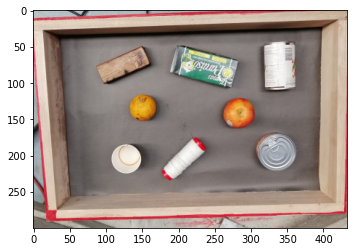

In [14]:
plt.imshow(bin_img)

In [15]:
def to_bin_frame(pxb, pyb, detections):
  pxo=pxb+int(shape[1]*detections['detection_boxes'][0][0][1])
  pyo=pyb+int(shape[0]*detections['detection_boxes'][0][0][0])
  return (pxo, pyo)

## Agnostic segmentation

In [ ]:
MODEL_PATH="/content/FAT_trained_Ml2R_bin_fine_tuned.pth"
#rgb_img = cv2.imread(RGB_IMAGE_PATH)
predictions = agnostic_segmentation.segment_image(bin_img, MODEL_PATH)
seg_img = agnostic_segmentation.draw_segmented_image(bin_img, predictions)

In [17]:
pred_boxes={}
for i in range(len(predictions["instances"])):
  pred_boxes[i]=predictions["instances"][i].get_fields()["pred_boxes"].tensor.numpy()[0]

In [18]:
len(pred_boxes)

8

In [34]:
pred_boxes

{0: array([316.96756 ,  43.074036, 362.53214 , 112.24083 ], dtype=float32),
 1: array([176.35414, 173.0188 , 240.47491, 234.66272], dtype=float32),
 2: array([187.8414 ,  48.89874, 282.52707, 106.50809], dtype=float32),
 3: array([ 87.47981 ,  50.294403, 161.85924 , 101.68022 ], dtype=float32),
 4: array([108.31352, 185.5657 , 148.11995, 223.88931], dtype=float32),
 5: array([133.3537  , 116.376526, 170.79861 , 153.29944 ], dtype=float32),
 6: array([263.15884, 121.63165, 305.15317, 162.74963], dtype=float32),
 7: array([309.5174 , 169.93112, 361.50125, 220.69455], dtype=float32)}

In [70]:
zoom_p = 0.2
roi = (pred_boxes[0]*np.array([1-zoom_p, 1-zoom_p, 1+zoom_p, 1+zoom_p])).astype(int)

In [71]:
obj_img=bin_img[roi[1]:roi[3], roi[0]:roi[2]]

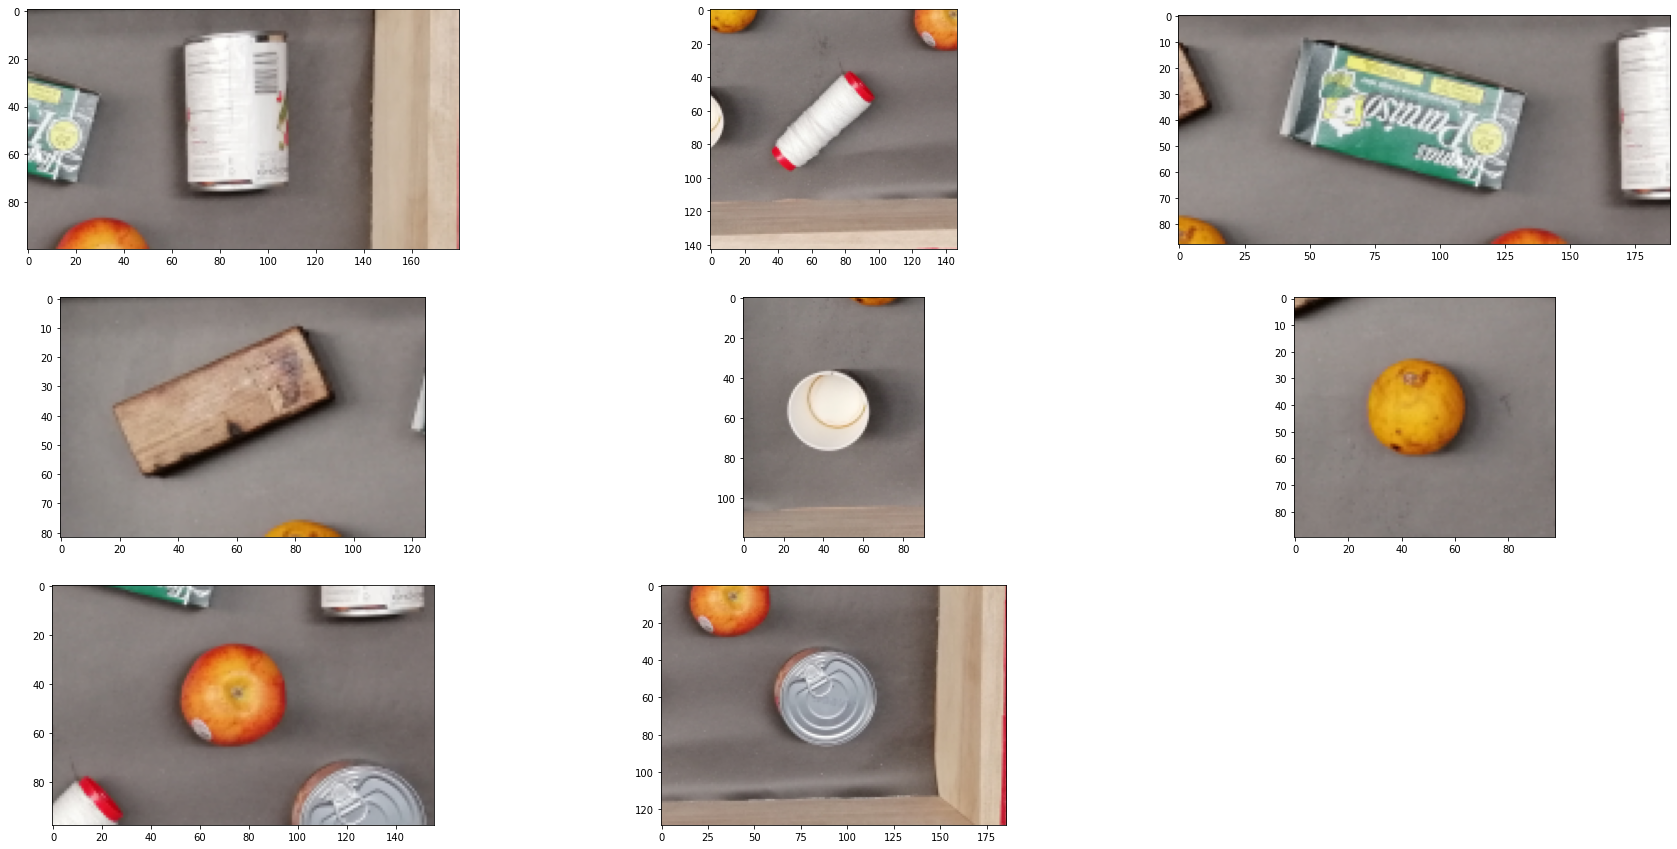

In [69]:
plt.figure(figsize=(30, 15))
for i in range(len(pred_boxes)):
  plt.subplot(3, round(len(pred_boxes)/3), i+1)
  roi = (pred_boxes[i]*np.array([1-zoom_p, 1-zoom_p, 1+zoom_p, 1+zoom_p])).astype(int)
  plt.imshow(bin_img[roi[1]:roi[3], roi[0]:roi[2]])
plt.show()

In [72]:
def to_obj_frame(px, py, roi):
  pxb=px+int(roi[1])
  pyb=py+int(roi[0])
  return (pxb, pyb)

## Grasping hypotheses

In [85]:
!mkdir models

mkdir: cannot create directory ‘models’: File exists


In [ ]:
device2 = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
MODEL_FILE = '/content/grasping_v2/ggcnn/ggcnn2_093'
model = torch.load(MODEL_FILE, map_location=device2)

In [ ]:
ix=detections['detection_boxes'][0][0][1]
iy=detections['detection_boxes'][0][0][0]
depth_crop = depth_img[ix+roi[1]:ix+roi[3],iy+roi[0]:iy+roi[2]]

In [ ]:
# Agrega un borde de un pixel a la imagen - para aplicar filtros
# Crea una mascara verificando si hay nan (en general dara ceros)
with TimeIt('1'):
    depth_crop = cv2.copyMakeBorder(depth_crop, 1, 1, 1, 1, cv2.BORDER_DEFAULT)
    depth_nan_mask = np.isnan(depth_crop).astype(np.uint8)
# Si encuentra algun valor que sea nan lo vuelve cero 
with TimeIt('2'):
    depth_crop[depth_nan_mask==1] = 0
# Normalizacion
with TimeIt('3'):
    # Scale to keep as float, but has to be in bounds -1:1 to keep opencv happy.
    depth_scale = np.abs(depth_crop).max()
    depth_crop = depth_crop.astype(np.float32) / depth_scale 
# Elimina trazos u otras imperfecciones
# with TimeIt('Inpainting'):
    # depth_crop = cv2.inpaint(depth_crop, depth_nan_mask, 1, cv2.INPAINT_NS)
# Restaura dimensiones y valores
depth_crop = depth_crop[1:-1, 1:-1] # quita el borde de 1 pixel
depth_crop = depth_crop * depth_scale
# Normaliza valores con el promedio en el rango [-1 1]
depth = depth_crop
depth = np.clip((depth - depth.mean()), -1, 1)
depthn = depth.copy()
# Convierte la imagen de profundidad a un tensor para usar en torch
depthT = torch.from_numpy(depth.reshape(1, 1, depth.shape[0], depth.shape[1]).astype(np.float32)).to(device2)

In [ ]:
# no_grad se utiliza para validaciones, acelera calculos y reduce memoria
with torch.no_grad():
    # Se realiza la prediccion de la red
    pred_out = model(depthT)
# Convierte el tensor de pythorch a un array de np, eliminando los ejes 1,1
points_out = pred_out[0].cpu().numpy().squeeze()
cos_out = pred_out[1].cpu().numpy().squeeze()
sin_out = pred_out[2].cpu().numpy().squeeze()
ang_out = np.arctan2(sin_out, cos_out) / 2.0

width_out = pred_out[3].cpu().numpy().squeeze() * 70.0  # Scaled 0-150:0-1
filters=(5.0, 4.0, 2.0)
points_out = ndimage.filters.gaussian_filter(points_out, filters[0])  # 3.0
ang_out = ndimage.filters.gaussian_filter(ang_out, filters[1])
width_out = ndimage.filters.gaussian_filter(width_out, filters[2])
points_out = np.clip(points_out, 0.0, 1.0-1e-3)

In [ ]:
grasps = grasp.detect_grasps(points_out, ang_out, 0.5, width_img=width_out, no_grasps=10)
# maxgrasps = evaluation1.plot_output(width_out, depth, points_out, ang_out, grasps, depth_crop2, crop_size, y_off, x_off)
grasps_info = evaluation1.grasp_info(width_out, points_out, ang_out, grasps)
for g in grasps_info:
    print(g)

## Best grasp data

## Move pixels to original frame

## Transform to distance

## Publish data